<a href="https://www.kaggle.com/code/najeebz/multiclass-prediction-lgbm-simple-and-easy?scriptVersionId=163494037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)
### Playground Series - Season 4, Episode 2

_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Multi-Class Prediction of Obesity Risk. Kaggle.](https://www.kaggle.com/competitions/playground-series-s4e2)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/multiclass-prediction-lgbm-simple-and-easy)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Multi-Class Prediction of Obesity Risk. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/multiclass-prediction-lgbm-simple-and-easy

___________________________________________________________________
# Other Contributions to this Competition:
1. [Obesity Risk Features Generation XGBoost](https://www.kaggle.com/code/najeebz/obesity-risk-features-generation-xgboost)
1. [Obesity Risk Multi Class MLP Classifier | Detailed](https://www.kaggle.com/code/najeebz/obesity-risk-multi-class-mlp-classifier-detailed)
1. [Obesity Risk Viz, EDA, Auto Visualization tools](https://www.kaggle.com/code/najeebz/obesity-risk-viz-eda-auto-visualization-tools)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')


In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
df.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
test.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Dataset Description:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA.

Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row
sample_submission.csv - a sample submission file in the correct format

# Visualization

In [8]:
cat_cols=df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']]
num_cols=df[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]


# Individual Columns

## Categorical Data Value Counts Plots

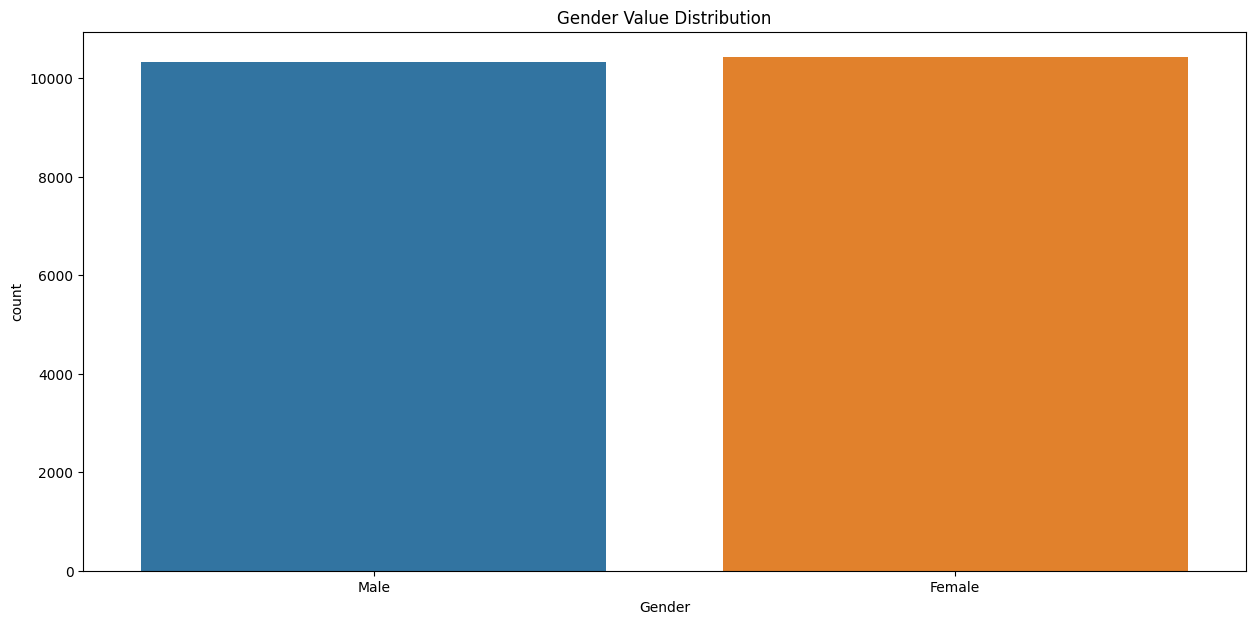

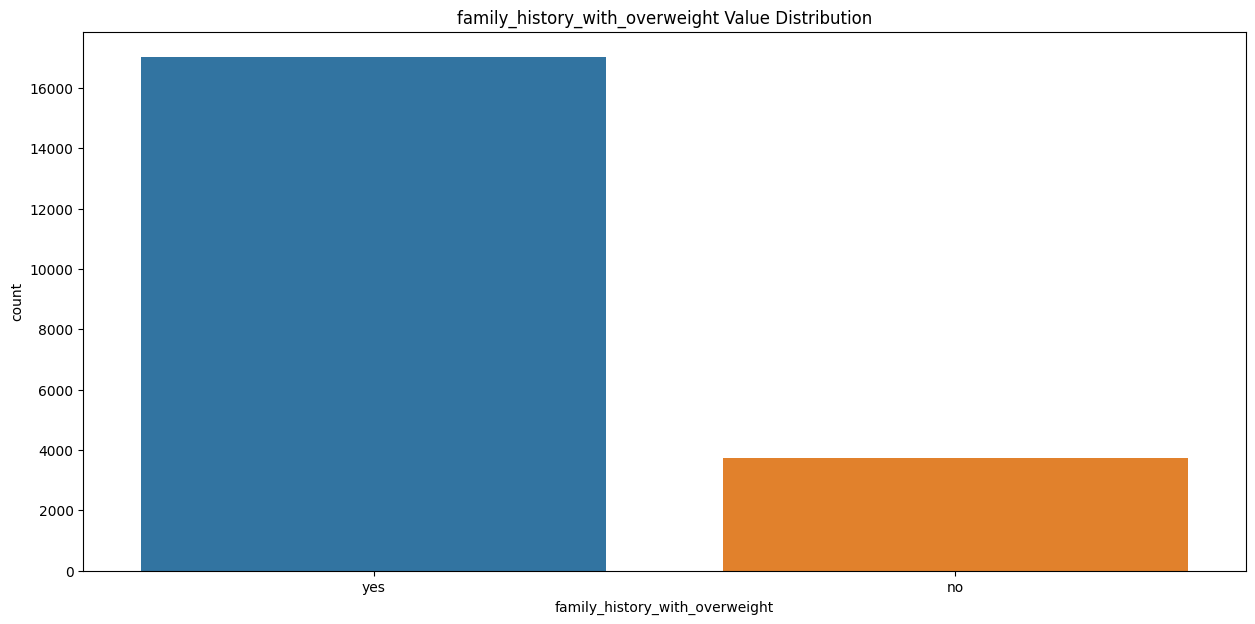

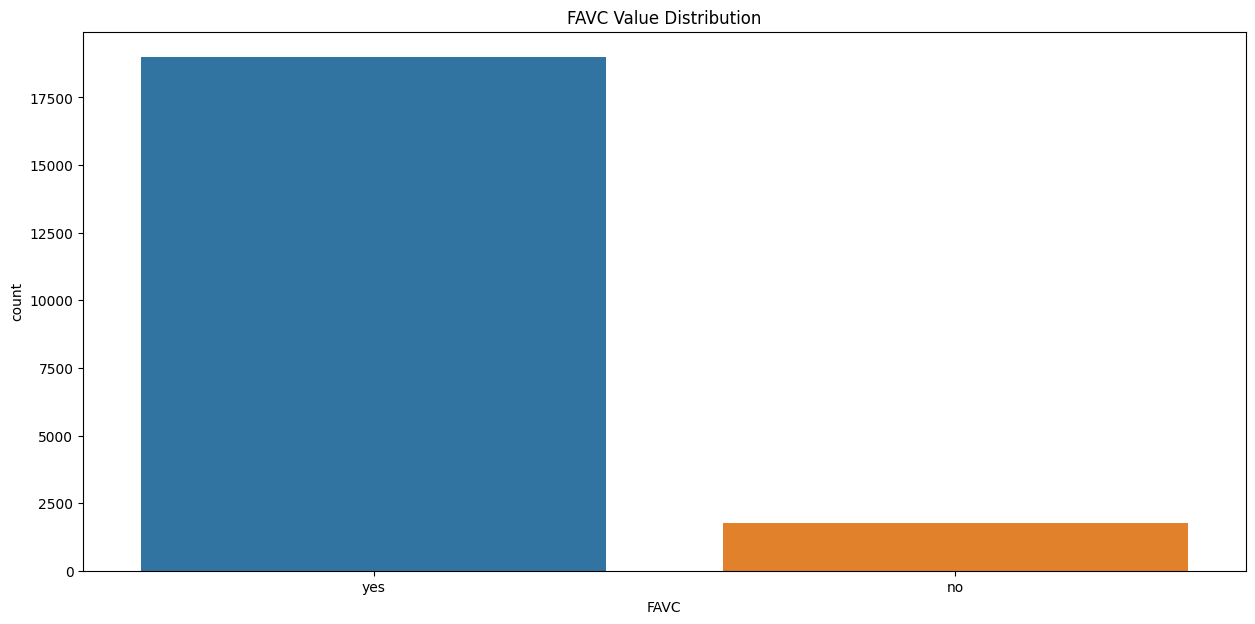

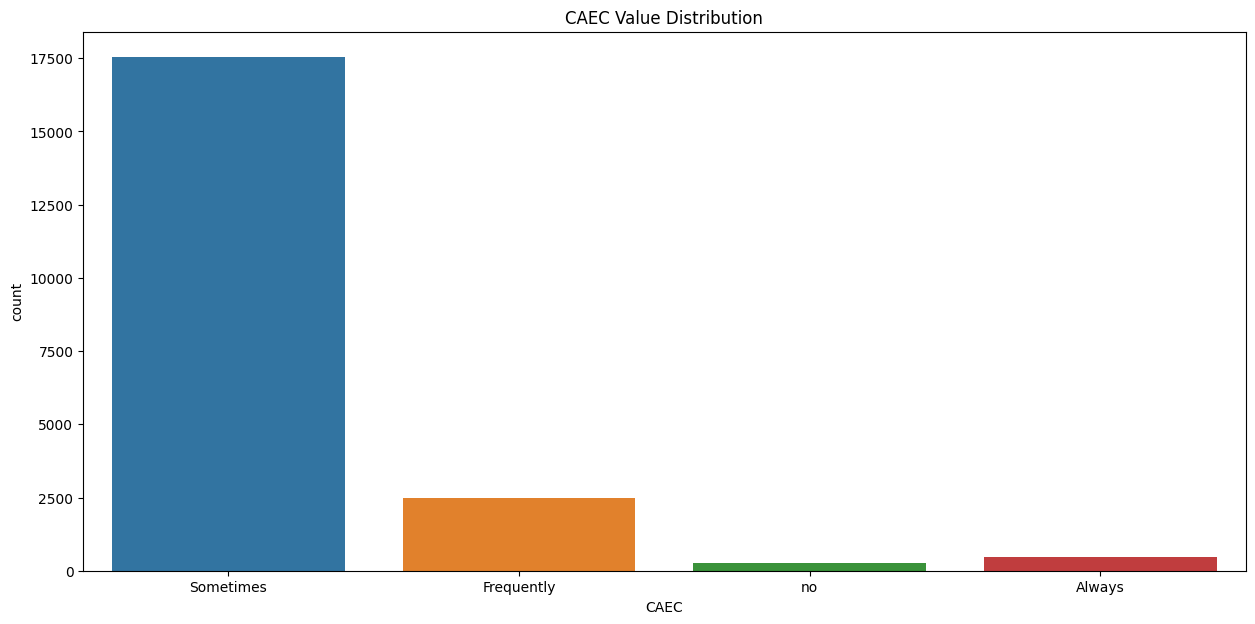

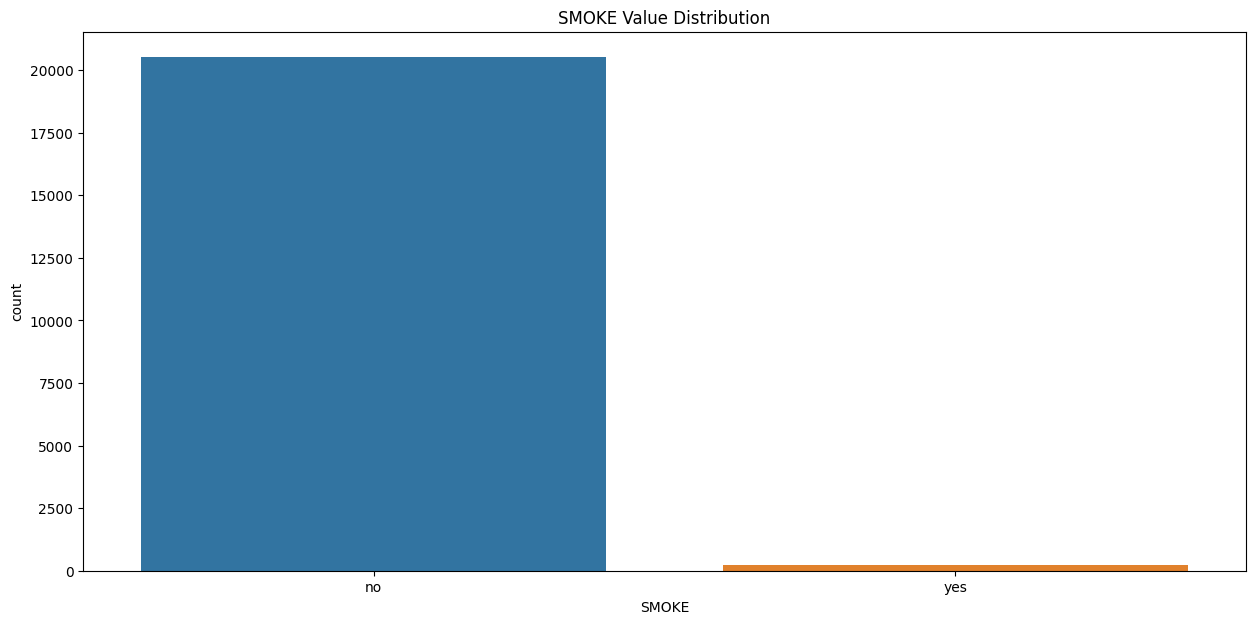

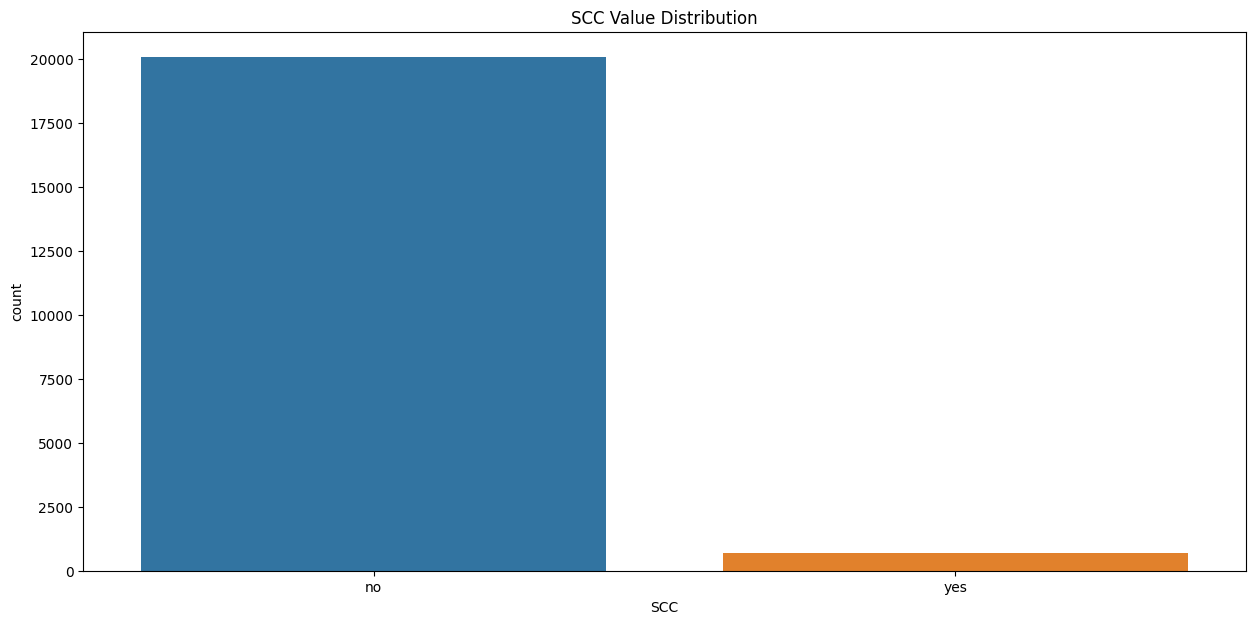

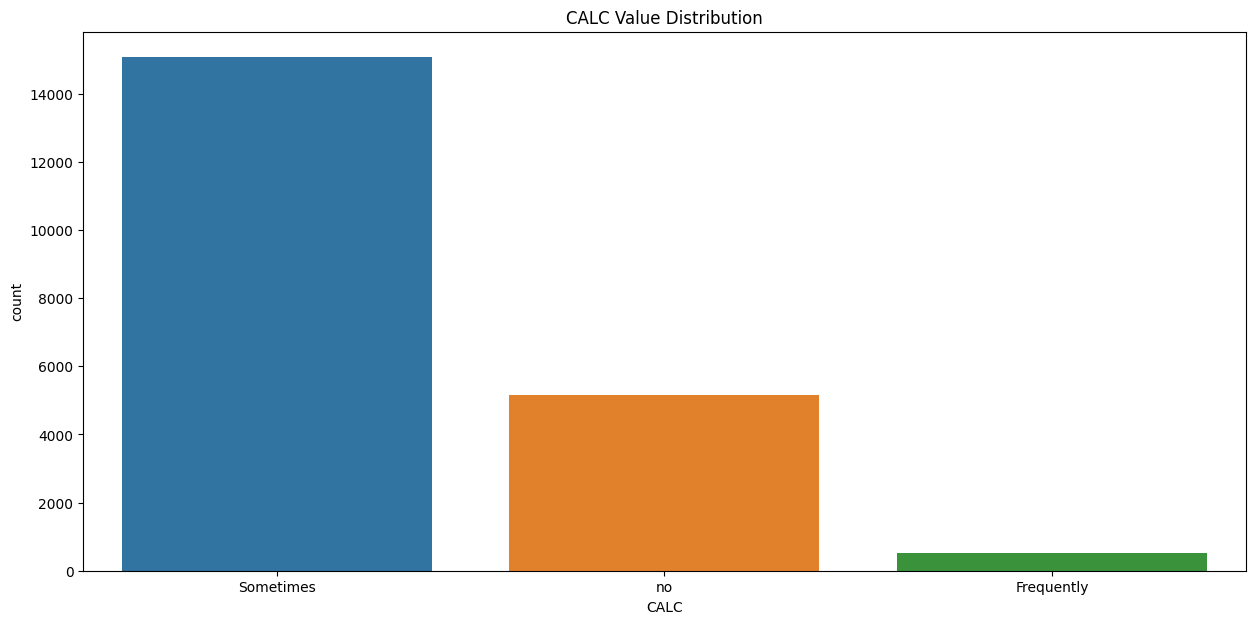

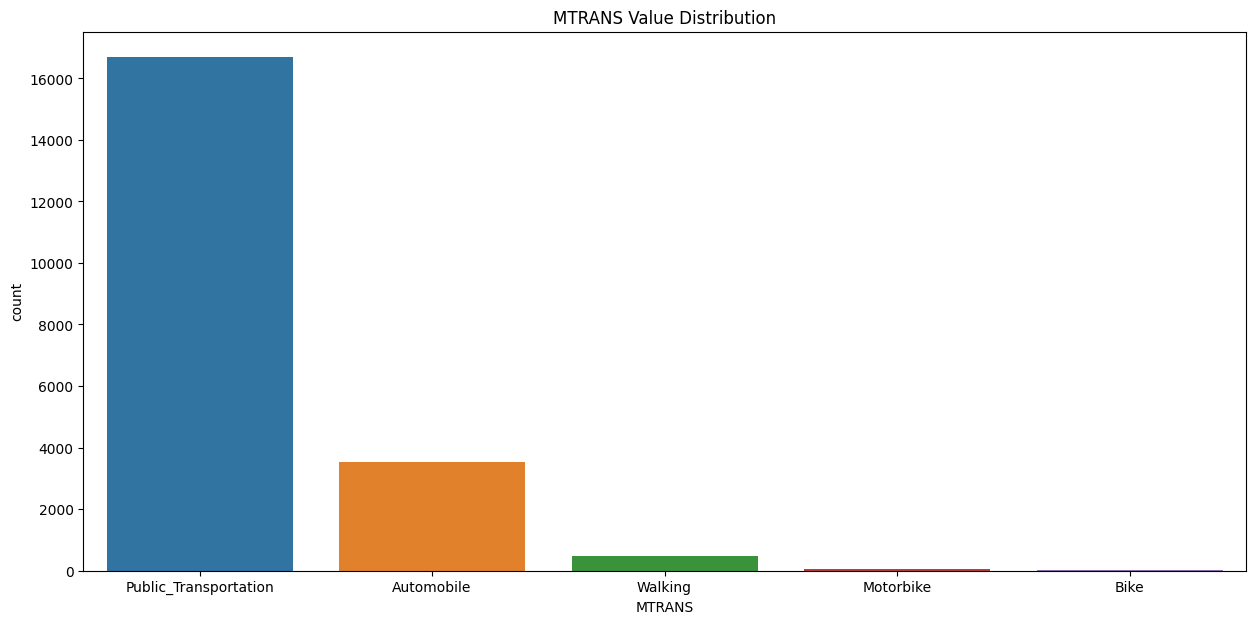

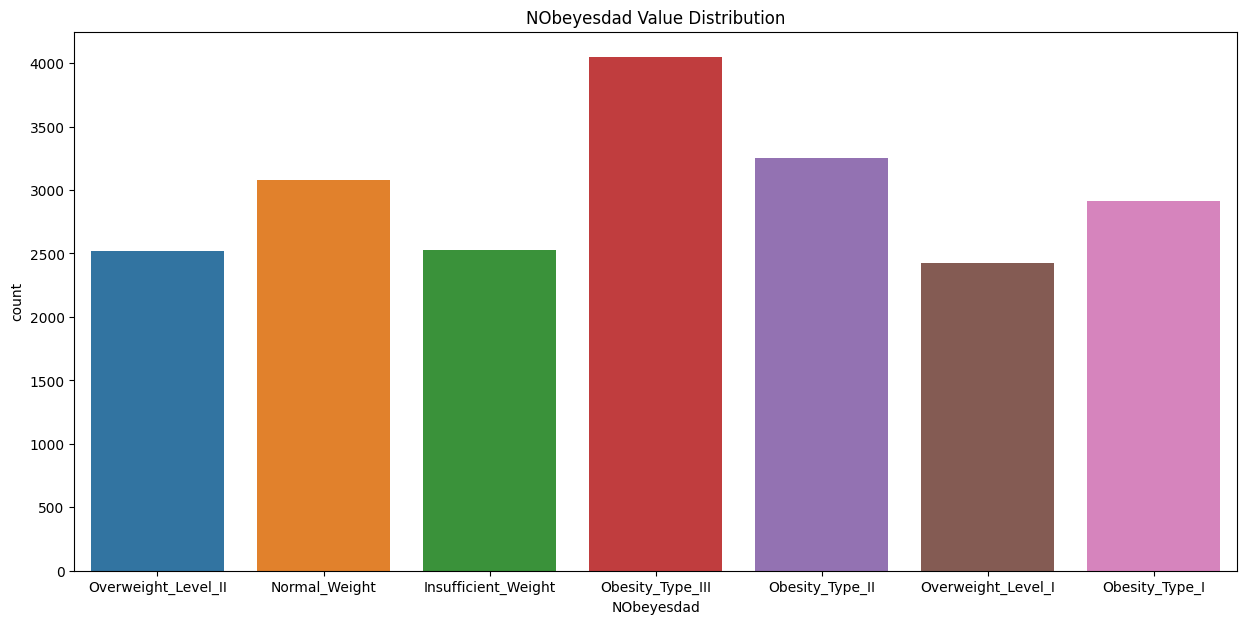

In [9]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=df[col]).set(title= col+' Value Distribution')
    plt.show()

## Numerical Columns Histograms and Mean Medians

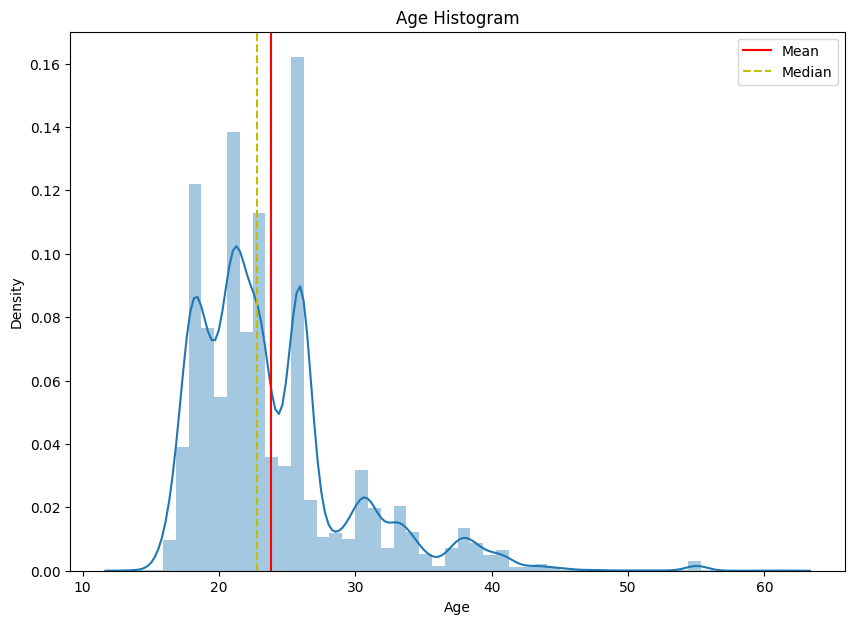

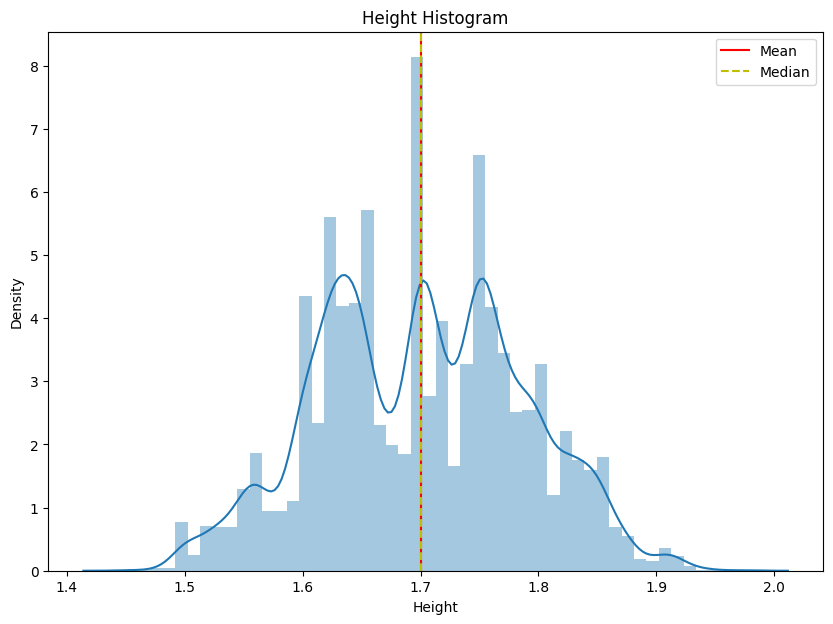

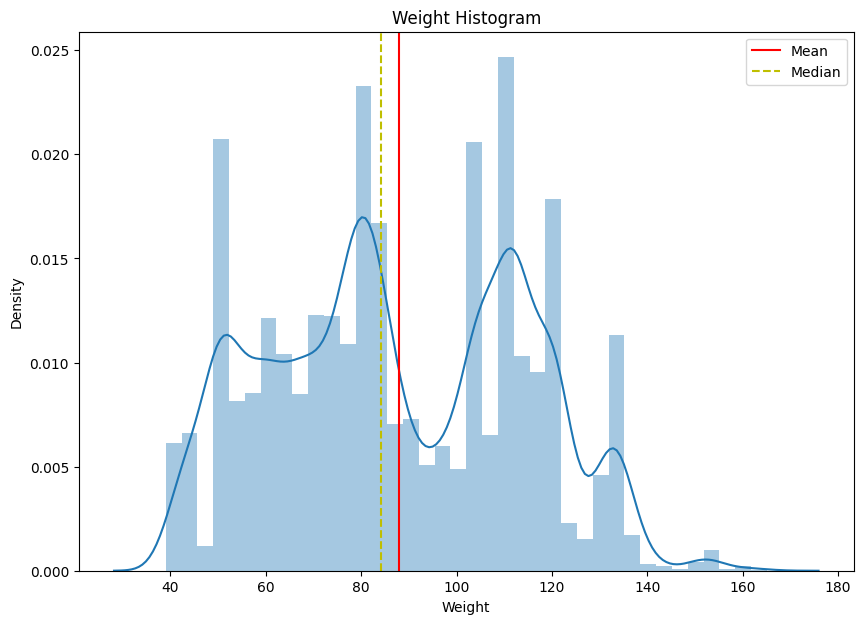

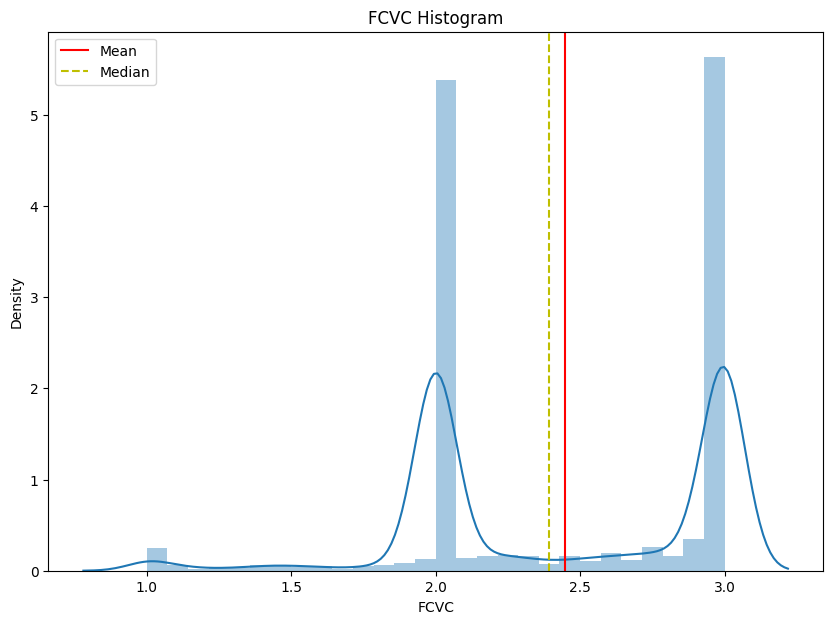

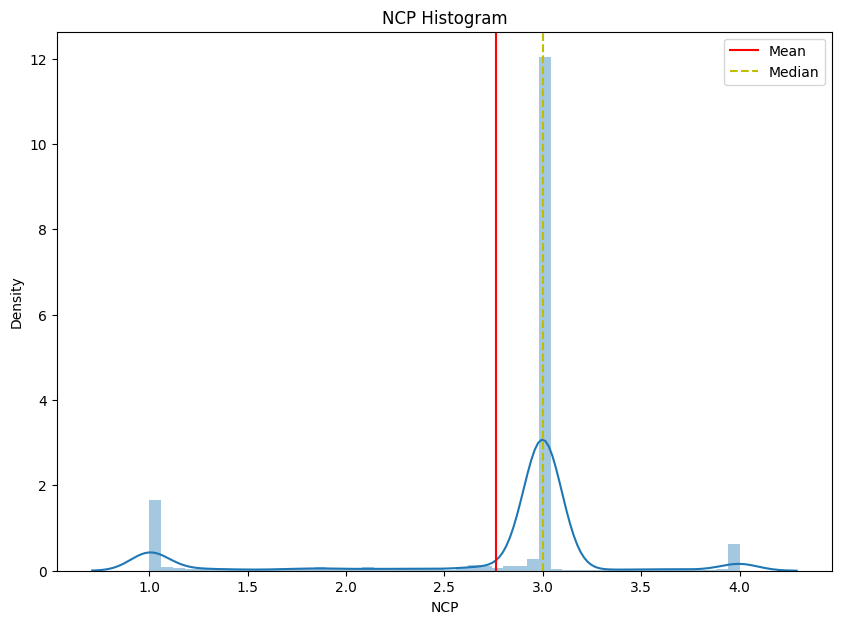

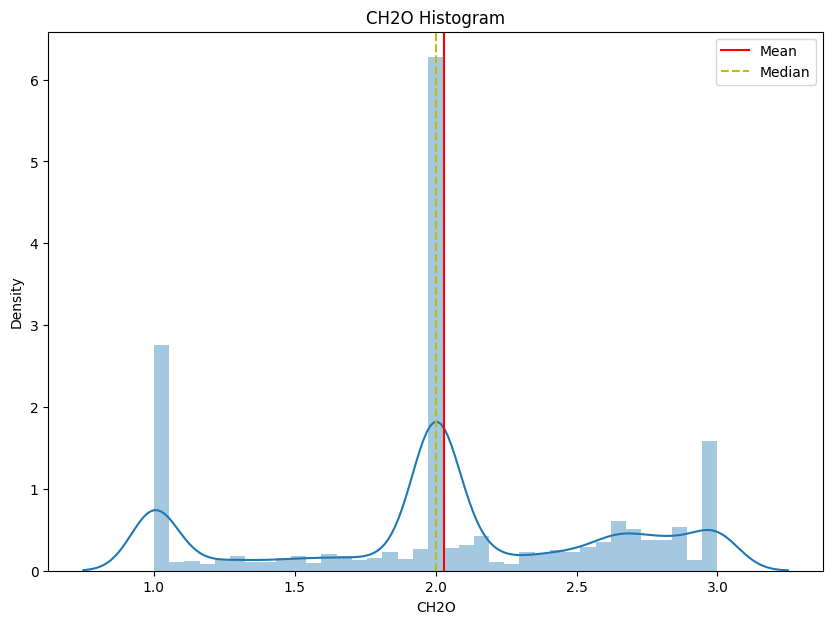

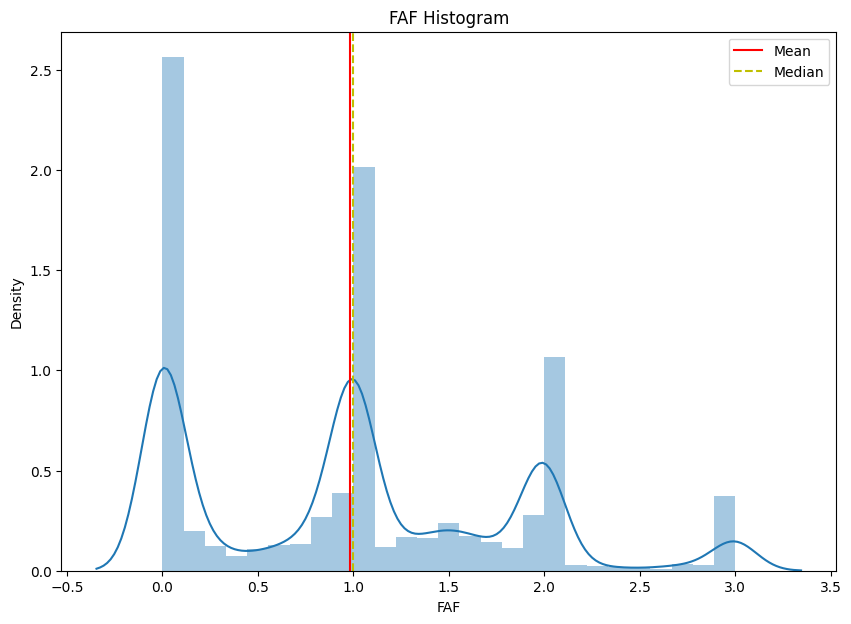

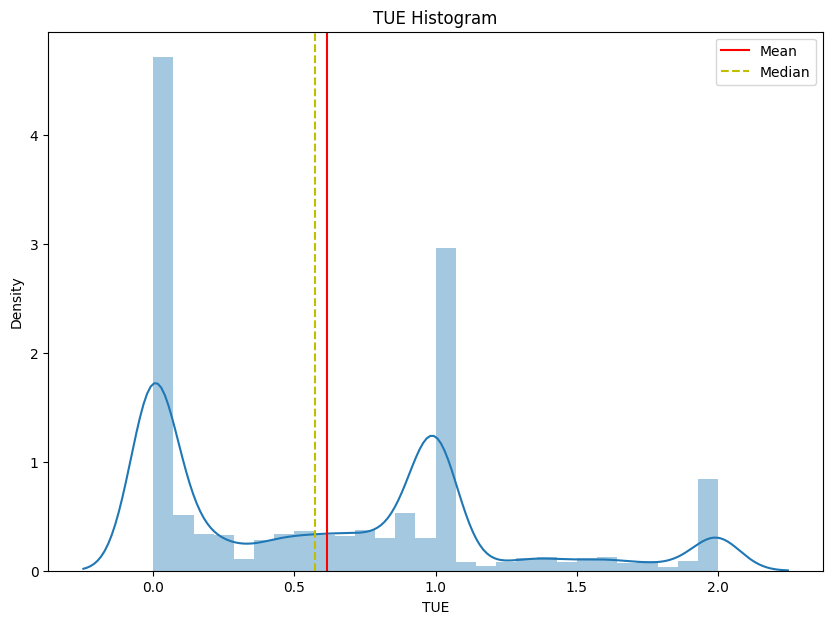

In [10]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()


# Categorical Columns Data Hierarchy 

In [11]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['NObeyesdad','Gender','MTRANS','family_history_with_overweight','SMOKE'], 
    color='Gender',color_discrete_map={'Male':'gold', 'Female':'darkblue'},
    width=1200, height=1200
)
fig.show()



## Analysis Note:
Obesity type 2 and Obesity type 3 are specific to one gender only as per the dataset

# Numerical Columns Gender wise Distribution in NObeyesdad

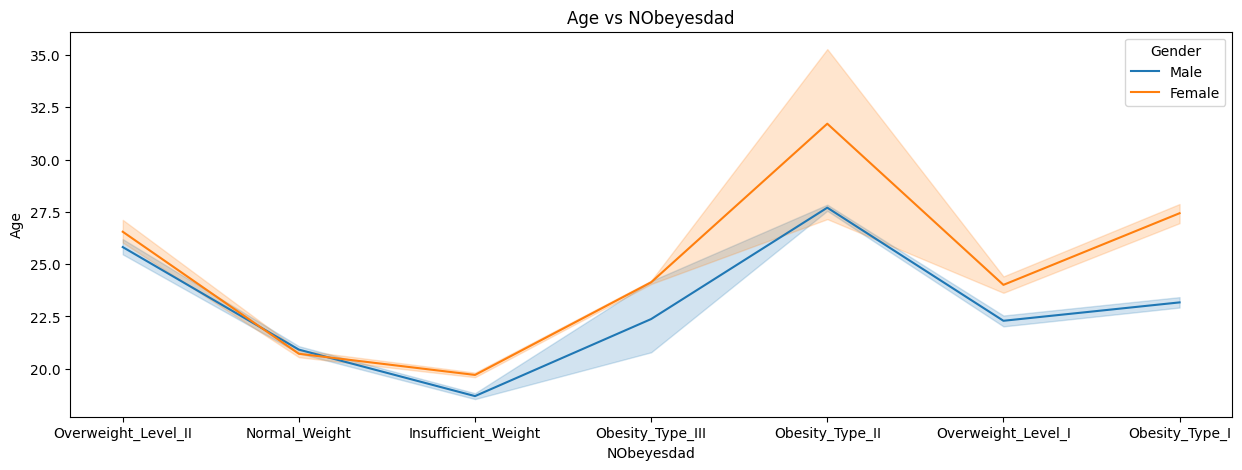

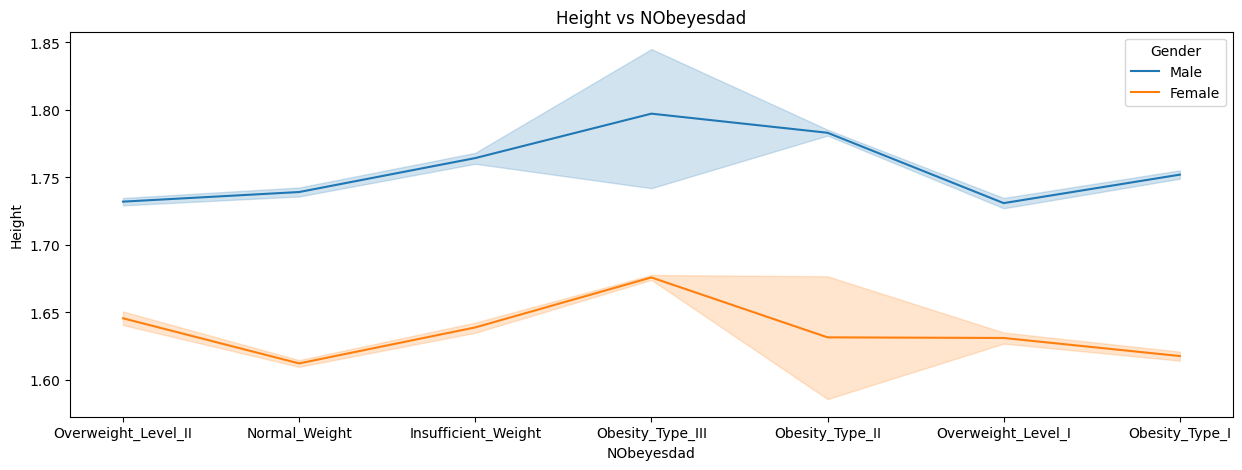

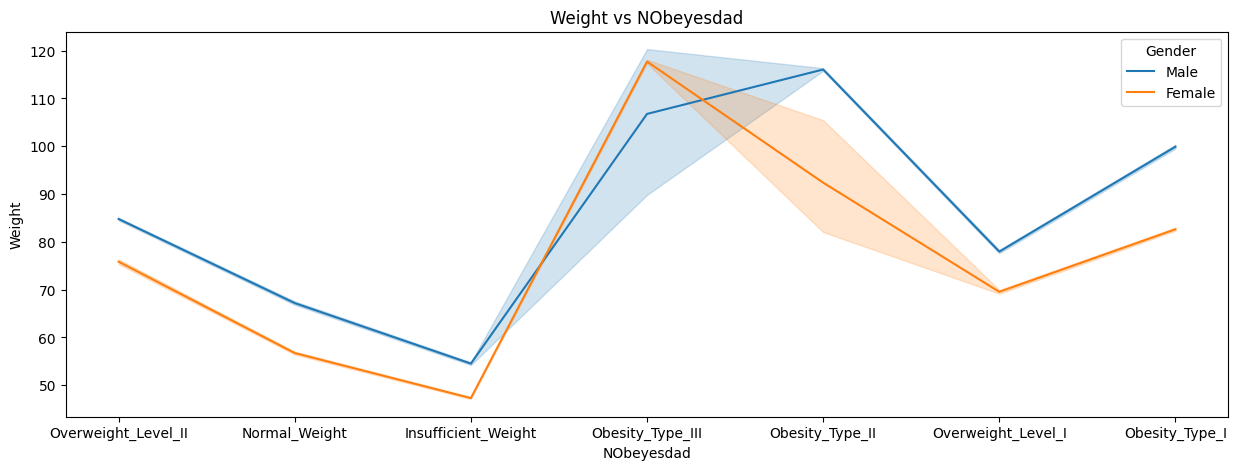

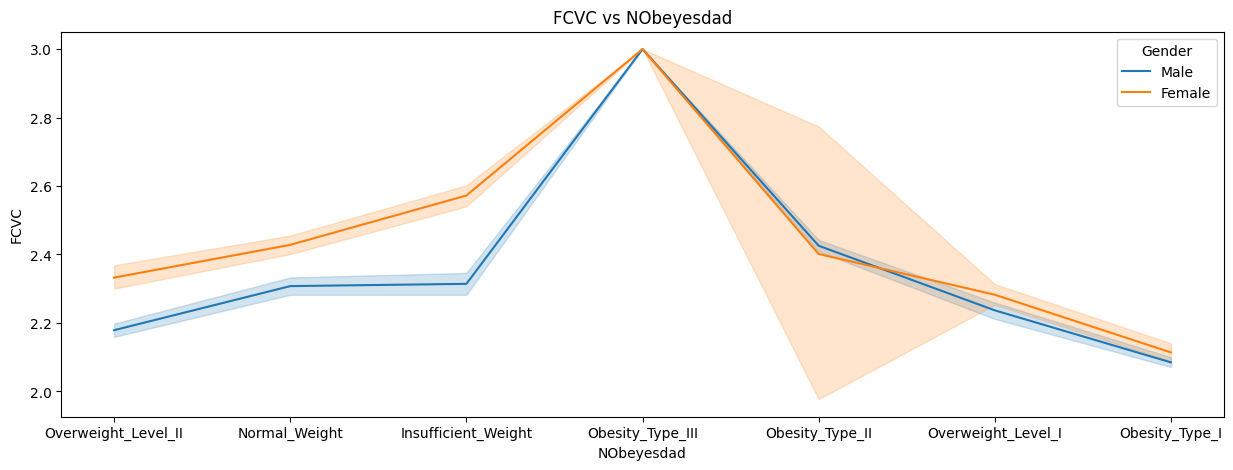

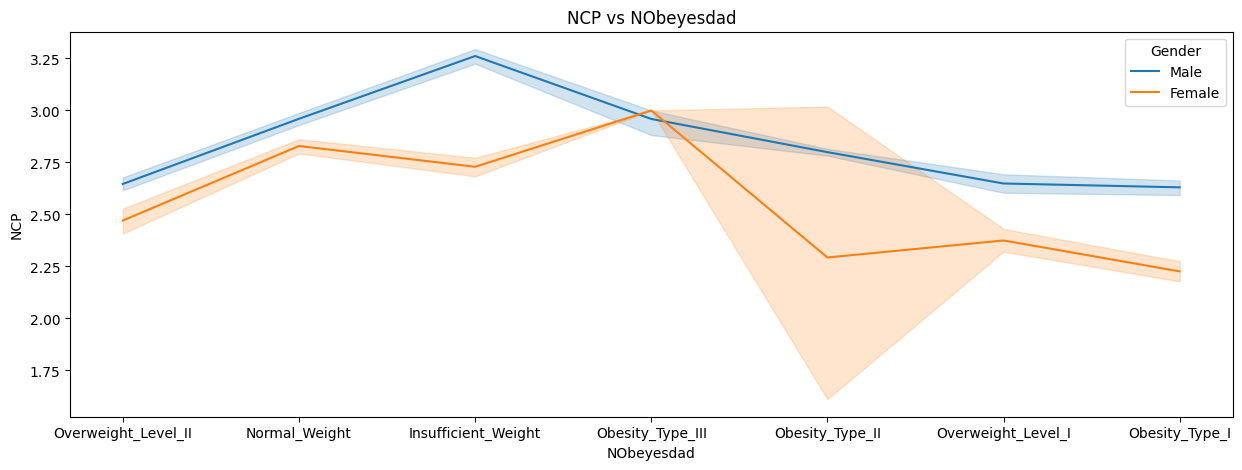

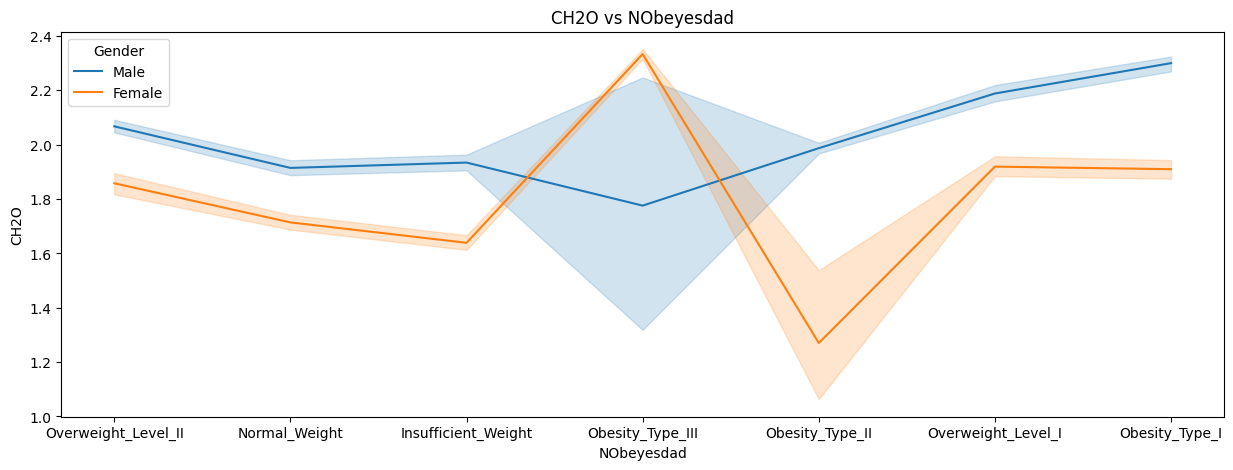

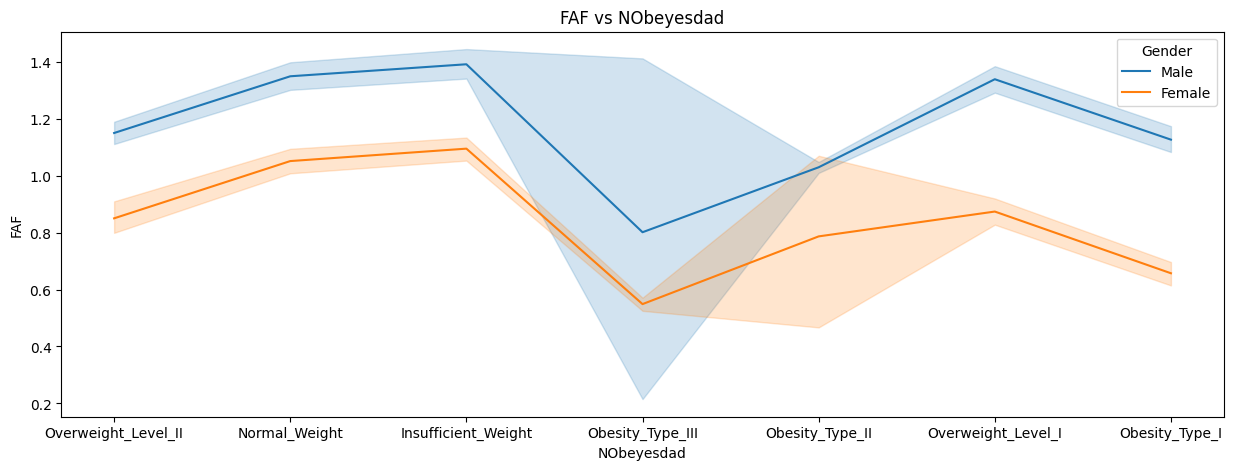

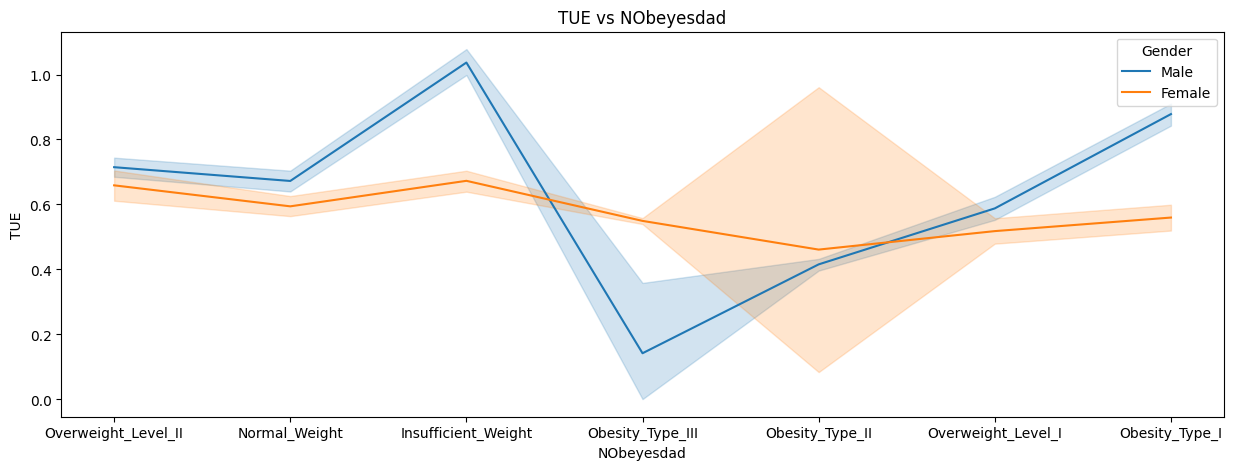

In [12]:
for col in num_cols:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=df, x='NObeyesdad', y=col, hue='Gender').set(title= col+' vs NObeyesdad')
    

In [13]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## Observations:
1. No Nulls
1. There are seven classifications, in which the data is divided. The column to predict is NObeyesdad
1. There are two classes of NObeyesdad specific to Male and Female only.
1. Data Distribution is quite uniform, all classes have 2400-3200 representation apart of one class which has 4046 rows.


In [14]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Features Generation

## Feature 1: BMI
Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms (kg) and height in metres (m).

In the current dataset, BMI can be used to distinguis two classes out of the seven; (Normal_Weight and Insufficient_Weight)

In [15]:
df['BMI']=df['Weight']/df['Height']
test['BMI']=test['Weight']/test['Height']


<Axes: xlabel='NObeyesdad', ylabel='BMI'>

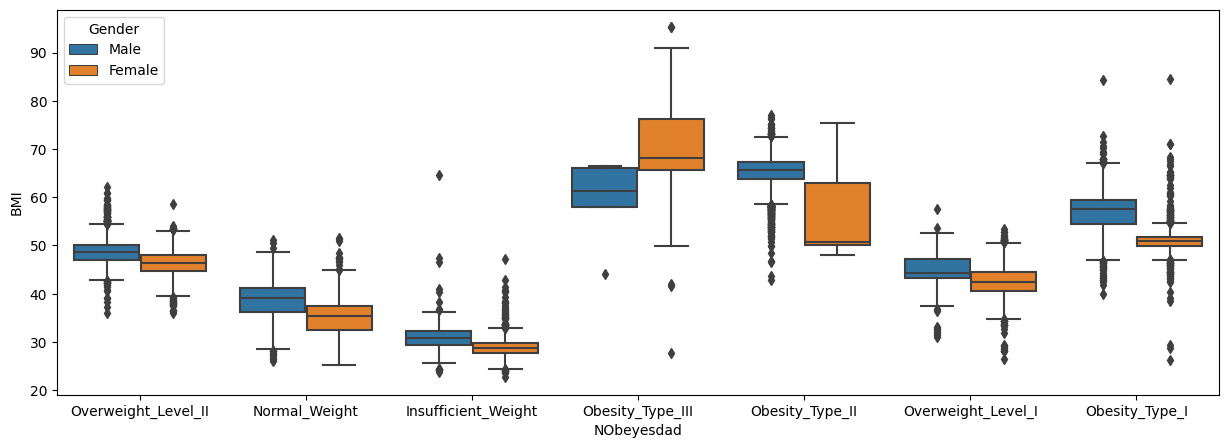

In [16]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=df,x='NObeyesdad',y='BMI', hue='Gender')

<Axes: xlabel='index'>

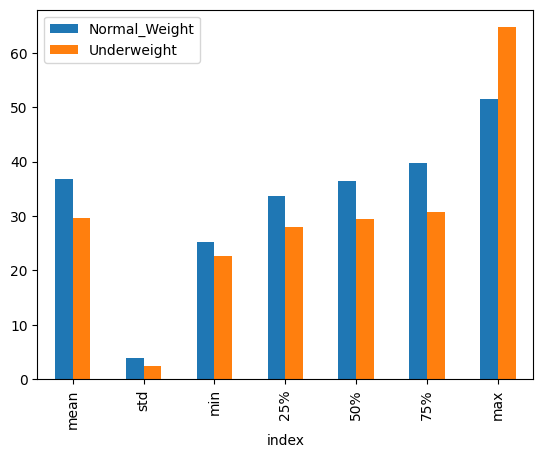

In [17]:
describe_df=df['BMI'][df['NObeyesdad']=='Normal_Weight'].describe().reset_index()
describe_df.rename(columns={'BMI':'Normal_Weight'}, inplace=True)
describe_df['Underweight']=df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].describe().reset_index().BMI
describe_df.drop(0).plot.bar(x='index')

count    2523.000000
mean       29.561223
std         2.376916
min        22.689706
25%        28.006269
50%        29.411765
75%        30.759807
max        64.669976
Name: BMI, dtype: float64

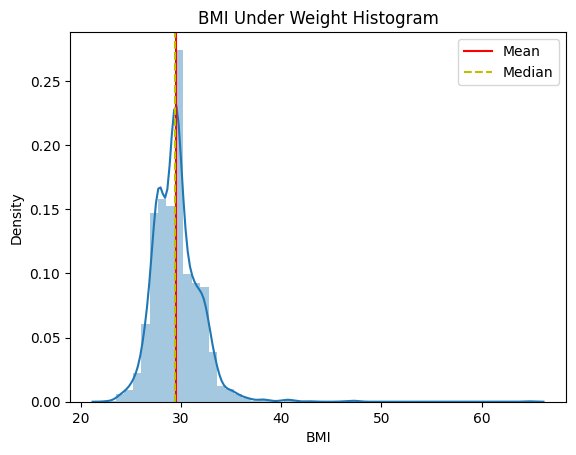

In [18]:
sns.distplot(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'],kde=True).set(title= 'BMI Under Weight Histogram')
plt.axvline(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].mean(),color='r', label='Mean')
plt.axvline(df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].median(),color='y', linestyle='--',label='Median')
plt.legend()
df['BMI'][df['NObeyesdad']=='Insufficient_Weight'].describe()

count    3082.000000
mean       36.745113
std         4.012057
min        25.149701
25%        33.742331
50%        36.419753
75%        39.757165
max        51.497006
Name: BMI, dtype: float64

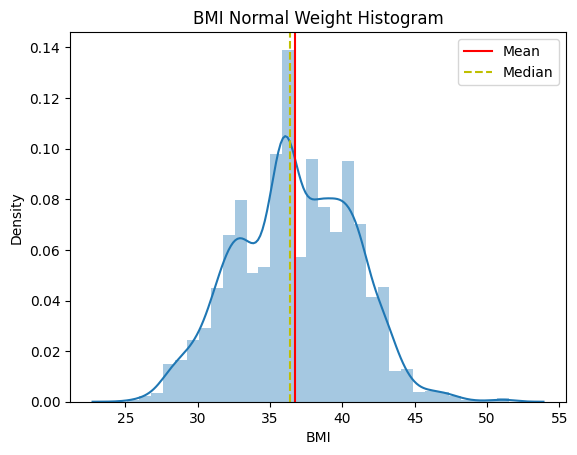

In [19]:
sns.distplot(df['BMI'][df['NObeyesdad']=='Normal_Weight'],kde=True).set(title= 'BMI Normal Weight Histogram')
plt.axvline(df['BMI'][df['NObeyesdad']=='Normal_Weight'].mean(),color='r', label='Mean')
plt.axvline(df['BMI'][df['NObeyesdad']=='Normal_Weight'].median(),color='y', linestyle='--',label='Median')
plt.legend()
df['BMI'][df['NObeyesdad']=='Normal_Weight'].describe()

## Analysis:
BMI for the data doesn't reflect any linear relationship with obesity classification, and in contrast of the earlier assumption there are significant amount of outliers.It indicates that there must exist unaccounted, linear or non linear variables.We can have following scenarios;
1. delete the outliers, from the training dataset and train the model based on linearly related data only. 
1. Keep the data intact and add a 3 cluster column to it based on Height, Gender and Weight and/or Gender and BMI we can also add age in some equations to identify nonlinear relations.

In this Notebook we will go with option two and will create two K-mean Clusters.

In order to create clusters with Gender, we need to convert Gender into Numeric Column, Modifying the dataset, so let's make a copy of training data. before moving further

In [20]:
train_df=df.drop(columns='id')
test_df=test.drop(columns='id')

train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

## Now let's convert the labelled Catergorical Columns in Numeric/Boolean

In [21]:
cat_cols.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
cat_cols['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

# Label Encoding of Categorical Columns
Since test dataset has one additional unique value for CALC column i-e Always, So we need to encode the column separately

In [23]:
train_df['NObeyesdad'] = df['NObeyesdad'].map({'Overweight_Level_II':0, 'Normal_Weight':1,'Insufficient_Weight':2,'Obesity_Type_III':3,'Obesity_Type_II':4,'Overweight_Level_I':5,'Obesity_Type_I':6})
train_df['CALC'] = df['CALC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})
test_df['CALC'] = test['CALC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})
train_df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no':0, 'yes':1})
test_df['family_history_with_overweight'] = test['family_history_with_overweight'].map({'no':0, 'yes':1})
train_df['SMOKE'] = df['SMOKE'].map({'no':0, 'yes':1})
test_df['SMOKE'] = test['SMOKE'].map({'no':0, 'yes':1})
train_df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
test_df['Gender'] = test['Gender'].map({'Male':0, 'Female':1})
train_df['FAVC'] = df['FAVC'].map({'no':0, 'yes':1})
test_df['FAVC'] = test['FAVC'].map({'no':0, 'yes':1})
train_df['SCC'] = df['SCC'].map({'no':0, 'yes':1})
test_df['SCC'] = test['SCC'].map({'no':0, 'yes':1})
train_df['CAEC'] = df['CAEC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})
test_df['CAEC'] = test['CAEC'].map({'no':0, 'Sometimes':1,'Frequently':2,'Always':3})
train_df['MTRANS'] = df['MTRANS'].map({'Bike':0, 'Public_Transportation':1,'Automobile':2,'Walking':3,'Motorbike':4})
test_df['MTRANS'] = test['MTRANS'].map({'Bike':0, 'Public_Transportation':1,'Automobile':2,'Walking':3,'Motorbike':4})

In [24]:
test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,1,65.273262
1,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,1,41.250000
2,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,1,67.910192
3,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,1,66.748641
4,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,1,64.419076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,1,0,1.000000,0,0.807076,0.778632,1,1,45.330027
13836,1,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1,1,38.993711
13837,1,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,1,1,27.988219
13838,0,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,1,0,2.000000,0,3.000000,2.000000,0,1,32.716049


In [25]:
test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [26]:
train_df['NObeyesdad'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [27]:
train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [28]:
test_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI'],
      dtype='object')

## Creating Clusterred Features.

In [29]:
def cluster(X):
    from sklearn import cluster
    agglo = cluster.KMeans(n_clusters=3,random_state=0, n_init="auto")
    agglo.fit(X)
    return ((agglo.labels_+1)/5)

X=train_df[['BMI', 'Gender']]
train_df['Cluster-1']=(cluster(X)+1)/3  
X=train_df[['Gender','Age']]
train_df['Cluster-2']=(cluster(X)+1)/3  

X=test_df[['BMI', 'Gender']]
test_df['Cluster-1']=(cluster(X)+1)/3  
X=test_df[['Gender','Age']]
test_df['Cluster-2']=(cluster(X)+1)/3 

# Correlation between Features

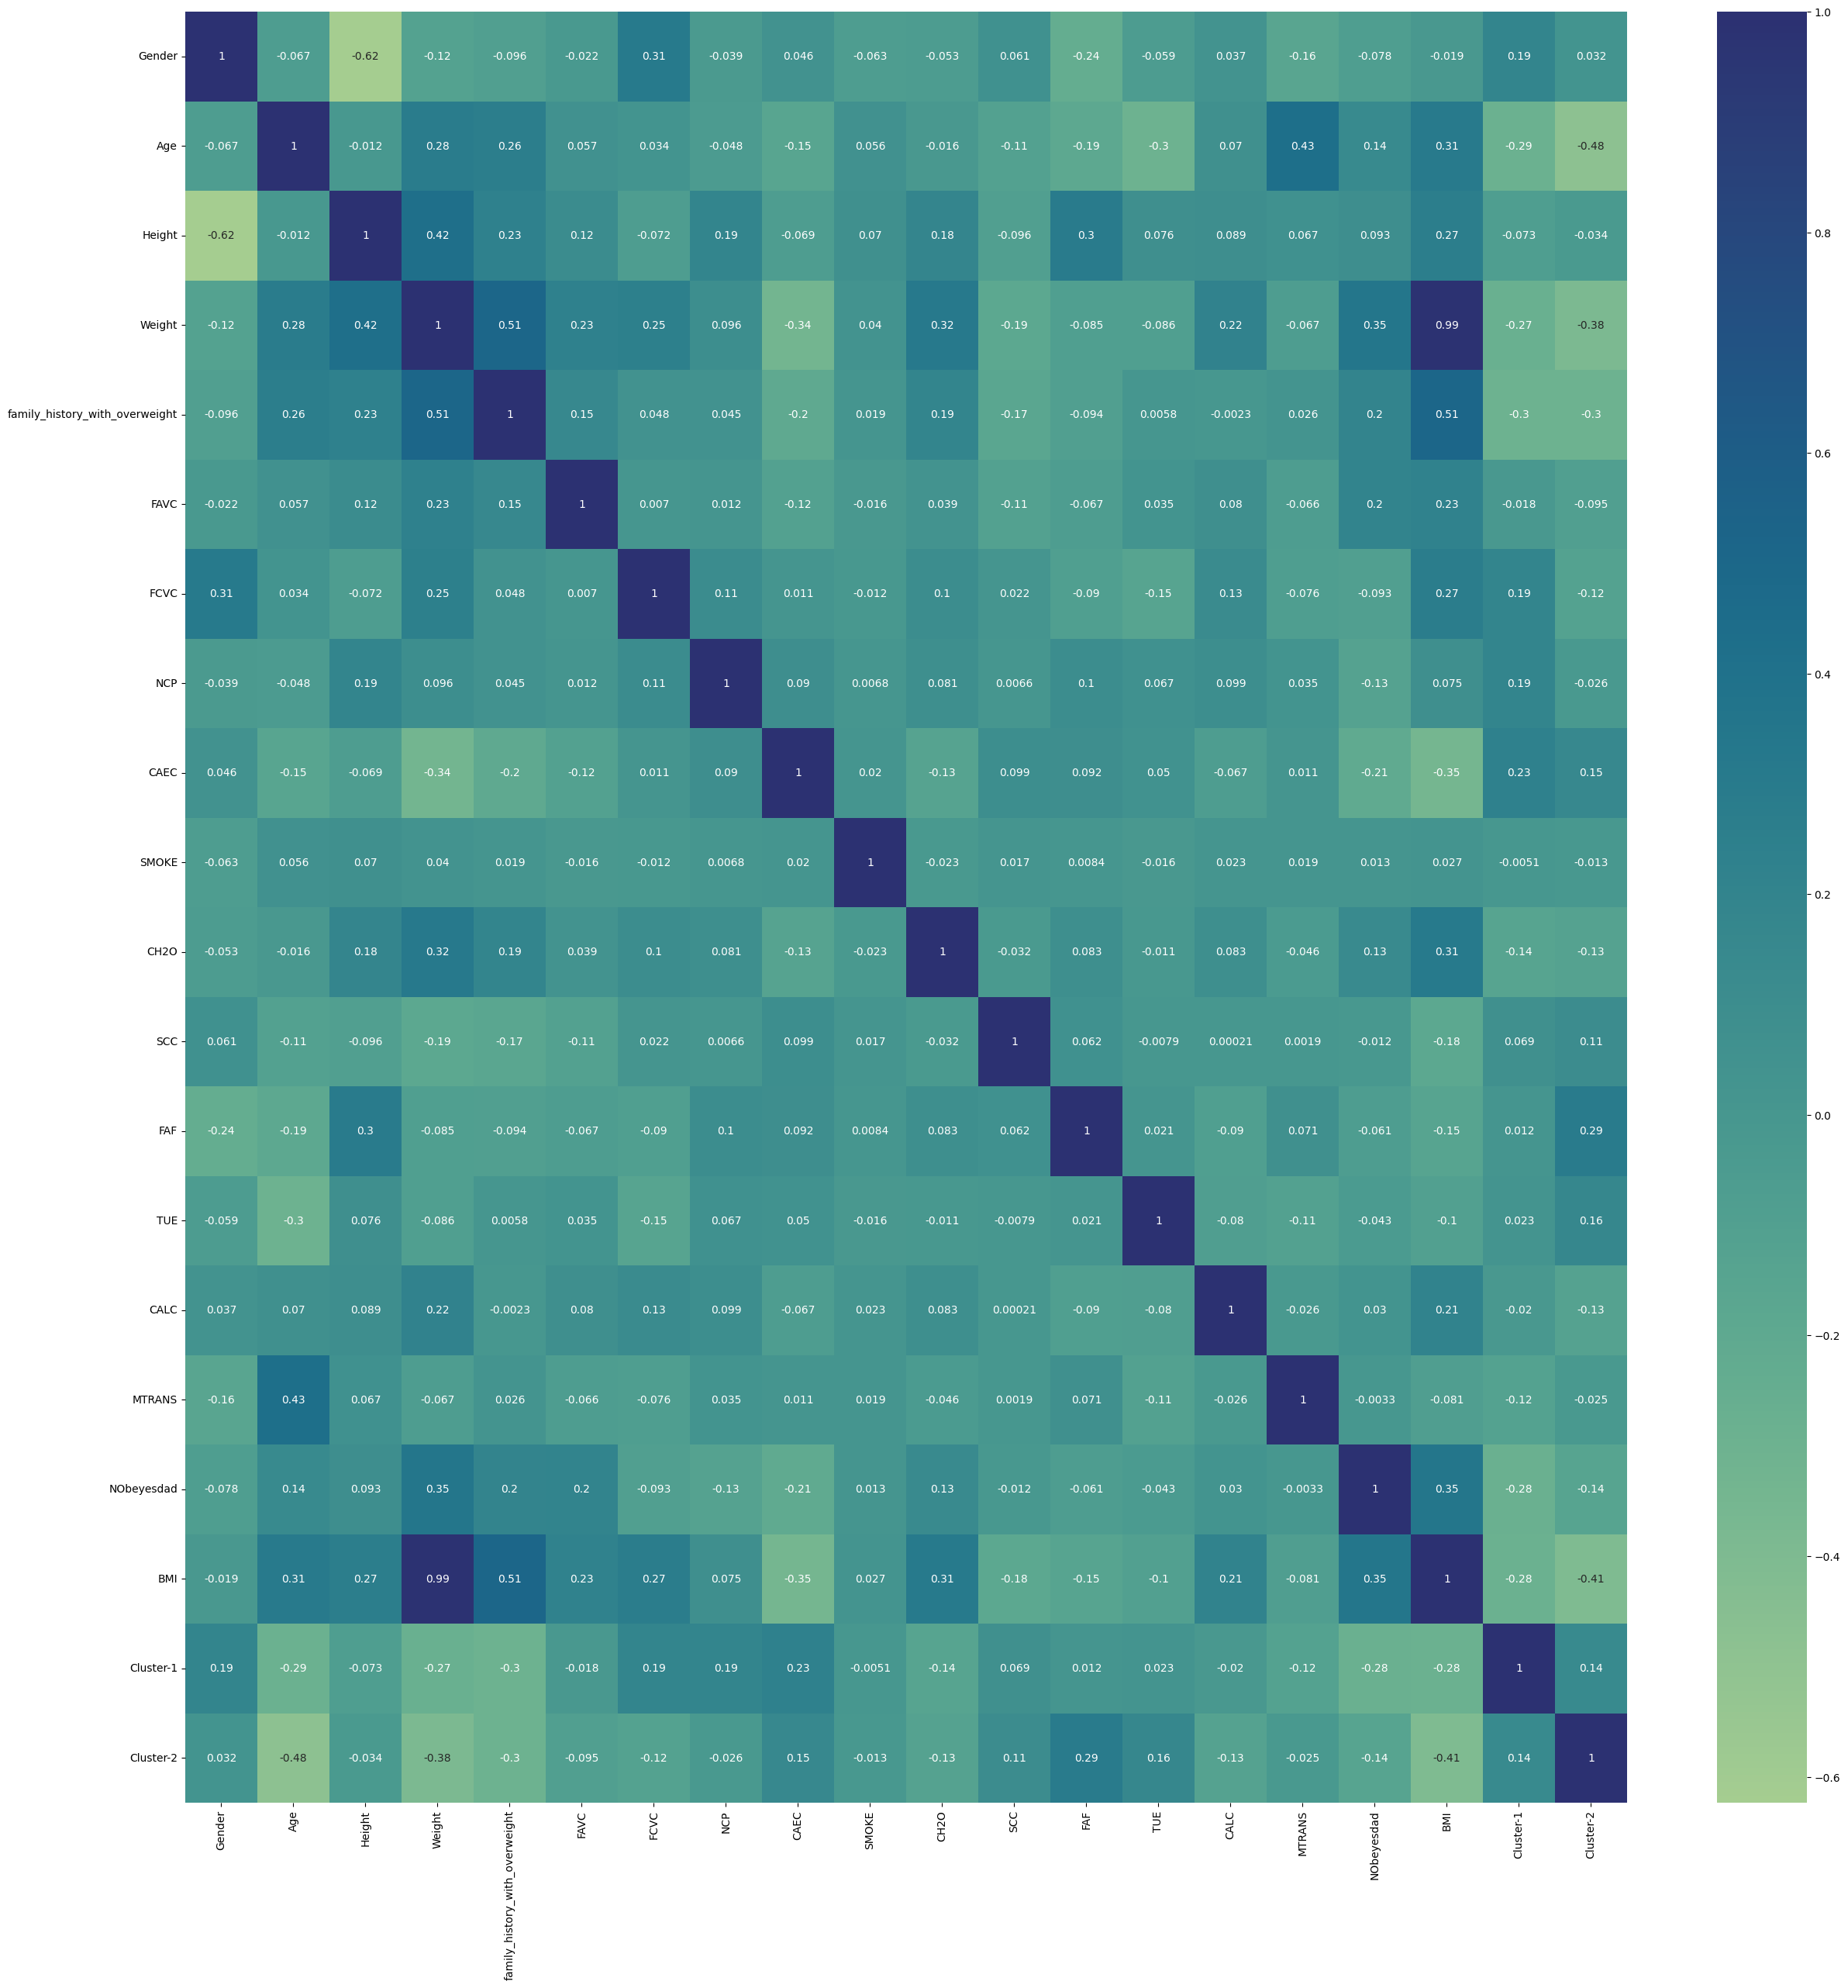

In [30]:
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(30,30))
s=sns.heatmap(corr,annot=True, cmap='crest')

# Creating Testing and Training Data

In [31]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [32]:
X=train_df.drop(columns='NObeyesdad')
y=train_df[['NObeyesdad']]
print(X.columns)
print(y.columns)
print(test_df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI', 'Cluster-1', 'Cluster-2'],
      dtype='object')
Index(['NObeyesdad'], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI', 'Cluster-1', 'Cluster-2'],
      dtype='object')


In [33]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.99, random_state=42)
X.keys()
test_df=scale(test_df)

# Creating Training Evaluation Function

In [34]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    s=sns.heatmap(cm,annot=True, cmap='Reds')

# Training LGBM Classifier

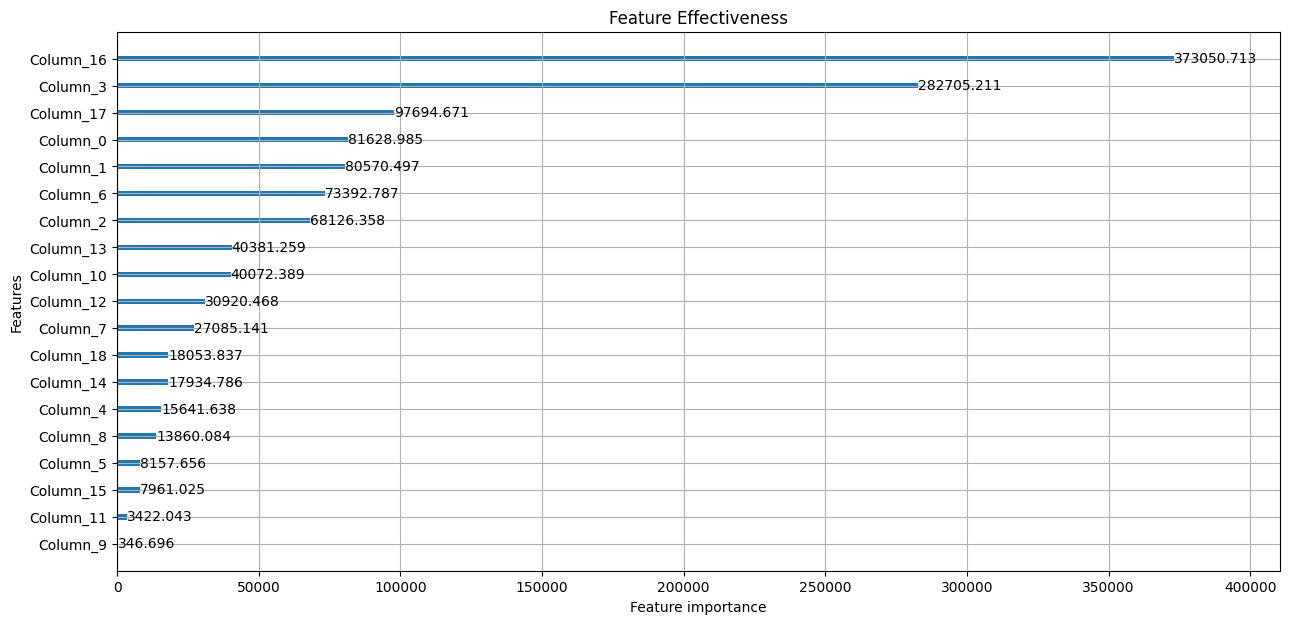

In [35]:
import lightgbm as lgb
params ={
        'objective':'multiclass',
        "metric": "multi_logloss",
        'random_state': 42,
        'num_class': 7,
        'n_estimators': 500,
        'learning_rate': 0.03,
        'lambda_l1': 0.01,
        'lambda_l2': 0.0402,
        'max_depth': 10,
        'colsample_bytree': 0.41,
        'subsample': 0.9536,
        'verbosity': -1,
        'boosting_type':'gbdt',
        'min_child_samples': 26
        }
mod = lgb.LGBMClassifier(**params)
mod.fit(X_train, y_train) 
lgb.plot_importance(mod, importance_type="gain",figsize=(15,7),title="Feature Effectiveness")
plt.show()
lbs=float(mod.score(X_test,y_test))

In [36]:
lbs

0.9134615384615384

# Predicting the results

In [37]:
test['NObeyesdad']=mod.predict(test_df)


In [38]:
test['NObeyesdad'].value_counts()

NObeyesdad
5    2676
3    2621
4    2145
2    2082
6    2031
0    1625
1     660
Name: count, dtype: int64

In [39]:
submission=test[['id','NObeyesdad']]


In [40]:
submission['NObeyesdad'].unique()

array([4, 5, 3, 6, 2, 1, 0])

# Creating the Submission File

In [41]:
submission['NObeyesdad'] = test['NObeyesdad'].map({0:'Overweight_Level_II', 1:'Normal_Weight',2:'Insufficient_Weight',3:'Obesity_Type_III',4:'Obesity_Type_II',5:'Overweight_Level_I',6:'Obesity_Type_I'})
submission['NObeyesdad'].value_counts()

NObeyesdad
Overweight_Level_I     2676
Obesity_Type_III       2621
Obesity_Type_II        2145
Insufficient_Weight    2082
Obesity_Type_I         2031
Overweight_Level_II    1625
Normal_Weight           660
Name: count, dtype: int64

In [42]:
submission.to_csv('submission.csv', index=False)

In [43]:
submission['NObeyesdad'].value_counts()

NObeyesdad
Overweight_Level_I     2676
Obesity_Type_III       2621
Obesity_Type_II        2145
Insufficient_Weight    2082
Obesity_Type_I         2031
Overweight_Level_II    1625
Normal_Weight           660
Name: count, dtype: int64